## Credit Card Customer Behavior Analysis

In [1]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
#
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Team:**
* Rishu Gandhi
* Shraddha Maurya

**Course:** DAAN 897– Data Mining (Spring II, 2020)

### Problem Statement
* The goal for this project is to perform clustering analysis to obtain meaningful insights and derive different strategies and expertise to target customers and increase profits.
    

### Challenges

* There are many business challenges that can be addressed using clustering analysis. The most important question for credit card companies is to determine who their targeting customers are and what exactly they can provide to their target customers to increase revenue. This can be addressed by clustering out groups of people based on their credit cards activity and it would be able to provide a clear output of where should companies focus more and be able to deploy suitable plan of action to each target group. Another big business challenge is to be able to predict bankruptcy. Based on people’s payment activities, it can help to learn which group of customers are more likely to go in bankruptcy by not being able to pay their loans on time.
    
* **Keywords:** Credit card customer behavior, clustering analysis 
	

### Data Collection
* Source(url):https://www.kaggle.com/arjunbhasin/credit-card-dataset#credit_data_norm.csv
* Short Description : Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.
* Keywords: credit card, balance, purchase, payment

### Required packages

* Add instructions to install the required packages
* make sure that all import statment have already their install packages
* pip install package_name

* pip install numpy
* pip install pandas
* pip install matplotlib
* pip install seaborn
* pip install sklearn

In [2]:
# Loading the required libraries
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import os
import warnings

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data_mining_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
# Loading the data
data = pd.read_csv('credit_data_norm.csv')
data.head(10)

,xslth_balance_0,fmeyv_balance_frequency_1,pwnjx_purchases_2,dxuli_oneoff_purchases_3,ojukq_installments_purchases_4,bvnag_cash_advance_5,gdoka_purchases_frequency_6,vozgu_oneoff_purchases_frequency_7,byefw_purchases_installments_frequency_8,jltvu_cash_advance_frequency_9,pmfyh_cash_advance_trx_10,jgcmz_purchases_trx_11,ehdqb_credit_limit_12,matvy_payments_13,itzsv_minimum_payments_14,ubvma_prc_full_payment_15,lkrsn_tenure_16
0,-0.080006,-0.059089,-0.018512,-0.014534,-0.014030,-0.020766,-0.323684,-0.202458,-0.281104,-0.090096,-0.026413,-0.035502,-0.116676,-0.030191,-0.009485,-0.153715,0.080447
1,0.086015,0.031820,-0.020457,-0.014534,-0.018270,0.115918,-0.490351,-0.202458,-0.364437,0.076571,0.006107,-0.041089,0.083658,0.046724,0.002724,0.068507,0.080447
2,0.048872,0.122729,-0.004691,0.004434,-0.018270,-0.020766,0.509649,0.797542,-0.364437,-0.090096,-0.026413,-0.007569,0.100352,-0.021905,-0.003101,-0.153715,0.080447
3,0.005367,-0.240907,0.010110,0.022241,-0.018270,-0.016401,-0.407018,-0.119125,-0.364437,-0.034541,-0.018283,-0.038296,0.100352,-0.034170,NaN,-0.153715,0.080447
4,-0.039214,0.122729,-0.020131,-0.014142,-0.018270,-0.020766,-0.407018,-0.119125,-0.364437,-0.090096,-0.026413,-0.038296,-0.109998,-0.020796,-0.008107,-0.153715,0.080447
5,0.012884,0.122729,0.006731,-0.014534,0.040987,-0.020766,0.176316,-0.202458,0.218896,-0.090096,-0.026413,-0.018743,-0.089965,-0.006567,0.020195,-0.153715,0.080447
6,-0.049215,0.122729,0.124141,0.142542,0.012325,-0.020766,0.509649,0.797542,0.635563,-0.090096,-0.026413,0.137682,0.300686,0.091109,-0.008718,0.846285,0.080447
7,0.013610,0.122729,-0.011562,-0.014534,0.001117,-0.020766,0.509649,-0.202458,0.635563,-0.090096,-0.026413,-0.007569,-0.073270,-0.020782,-0.004347,-0.153715,0.080447
8,-0.028858,0.122729,-0.002890,0.001694,-0.009381,-0.020766,-0.157018,-0.119125,-0.114437,-0.090096,-0.026413,-0.027122,0.083658,-0.020600,-0.007228,-0.153715,0.080447
9,-0.074161,-0.331816,0.005677,0.016907,-0.018270,-0.020766,-0.323684,-0.035791,-0.364437,-0.090096,-0.026413,-0.032709,0.217214,-0.011206,-0.009998,-0.153715,0.080447


### Data Preprocessing

* Enumerate and present the main steps you preformed in the data preprocessing
•	Apply descriptive statistics: means, std, min, max, range, ..
•	Preprocess features: skewness, type conversions, 
•	Detect any inconsistency/ missing values in the data. 
•	You should mention whether scaling/ normalization / transformation of the features are required. If it is, then what you have done.
•	Detect outliers, imbalanced or any inconsistent data, ….
•	Check correlations and linearity., interpret your results ?
•	Visualize and plot graphs/curves in support of your result..
•	Interpret and explain your data
* Add your code and interpret the outcome of main steps/functions


In [4]:
# Checking the shape of data
print(data.shape)
print('--------------------------------------------------------------------------------------------------------')
# Checking the datatypes of the columns
print(data.dtypes)
print('--------------------------------------------------------------------------------------------------------')
# Descriptive Stataistics of data
print(data.describe())

(8950, 17)
--------------------------------------------------------------------------------------------------------
xslth_balance_0                             float64
fmeyv_balance_frequency_1                   float64
pwnjx_purchases_2                           float64
dxuli_oneoff_purchases_3                    float64
ojukq_installments_purchases_4              float64
bvnag_cash_advance_5                        float64
gdoka_purchases_frequency_6                 float64
vozgu_oneoff_purchases_frequency_7          float64
byefw_purchases_installments_frequency_8    float64
jltvu_cash_advance_frequency_9              float64
pmfyh_cash_advance_trx_10                   float64
jgcmz_purchases_trx_11                      float64
ehdqb_credit_limit_12                       float64
matvy_payments_13                           float64
itzsv_minimum_payments_14                   float64
ubvma_prc_full_payment_15                   float64
lkrsn_tenure_16                             float64


In [5]:
# Checking for missing values
data.isna().sum()

xslth_balance_0                               0
fmeyv_balance_frequency_1                     0
pwnjx_purchases_2                             0
dxuli_oneoff_purchases_3                      0
ojukq_installments_purchases_4                0
bvnag_cash_advance_5                          0
gdoka_purchases_frequency_6                   0
vozgu_oneoff_purchases_frequency_7            0
byefw_purchases_installments_frequency_8      0
jltvu_cash_advance_frequency_9                0
pmfyh_cash_advance_trx_10                     0
jgcmz_purchases_trx_11                        0
ehdqb_credit_limit_12                         1
matvy_payments_13                             0
itzsv_minimum_payments_14                   313
ubvma_prc_full_payment_15                     0
lkrsn_tenure_16                               0
dtype: int64

There were few missing values for two variables: Minimum Payments and Credit Limit. Their missing values were replaced by their respective Mean value.

In [6]:
# Missing value treatment
data.fillna(data.mean(), inplace=True)
data.isna().sum()

xslth_balance_0                             0
fmeyv_balance_frequency_1                   0
pwnjx_purchases_2                           0
dxuli_oneoff_purchases_3                    0
ojukq_installments_purchases_4              0
bvnag_cash_advance_5                        0
gdoka_purchases_frequency_6                 0
vozgu_oneoff_purchases_frequency_7          0
byefw_purchases_installments_frequency_8    0
jltvu_cash_advance_frequency_9              0
pmfyh_cash_advance_trx_10                   0
jgcmz_purchases_trx_11                      0
ehdqb_credit_limit_12                       0
matvy_payments_13                           0
itzsv_minimum_payments_14                   0
ubvma_prc_full_payment_15                   0
lkrsn_tenure_16                             0
dtype: int64

In [7]:
list(data.columns.values)

['xslth_balance_0',
 'fmeyv_balance_frequency_1',
 'pwnjx_purchases_2',
 'dxuli_oneoff_purchases_3',
 'ojukq_installments_purchases_4',
 'bvnag_cash_advance_5',
 'gdoka_purchases_frequency_6',
 'vozgu_oneoff_purchases_frequency_7',
 'byefw_purchases_installments_frequency_8',
 'jltvu_cash_advance_frequency_9',
 'pmfyh_cash_advance_trx_10',
 'jgcmz_purchases_trx_11',
 'ehdqb_credit_limit_12',
 'matvy_payments_13',
 'itzsv_minimum_payments_14',
 'ubvma_prc_full_payment_15',
 'lkrsn_tenure_16']

The following Box-Plot distribution shows the outliers detected in the dataset for each column. It is evident from box plot that there are outliers existing in our dataset.  

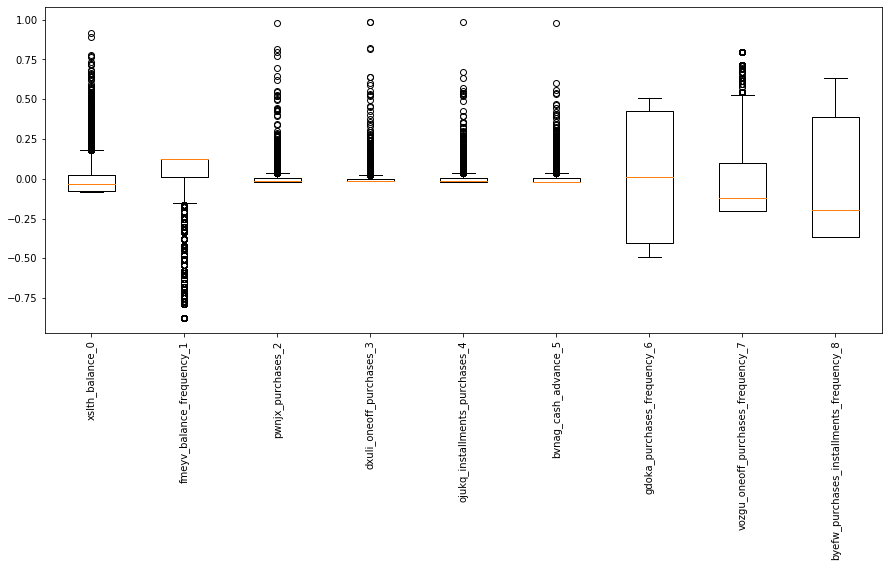

In [8]:
# Visualizing the outliers
fig, ax1 = plt.subplots(figsize=(15, 6))

ax1.boxplot([data.xslth_balance_0, data.fmeyv_balance_frequency_1, data.pwnjx_purchases_2, data.dxuli_oneoff_purchases_3,
            data.ojukq_installments_purchases_4, data.bvnag_cash_advance_5, data.gdoka_purchases_frequency_6, 
            data.vozgu_oneoff_purchases_frequency_7, data.byefw_purchases_installments_frequency_8])

boxplot1_labels = ['xslth_balance_0', 'fmeyv_balance_frequency_1', 'pwnjx_purchases_2', 'dxuli_oneoff_purchases_3',
            'ojukq_installments_purchases_4', 'bvnag_cash_advance_5', 'gdoka_purchases_frequency_6', 
            'vozgu_oneoff_purchases_frequency_7', 'byefw_purchases_installments_frequency_8']

ax1.set_xticklabels(np.repeat(boxplot1_labels, 1), rotation=90, fontsize=10)

plt.show()

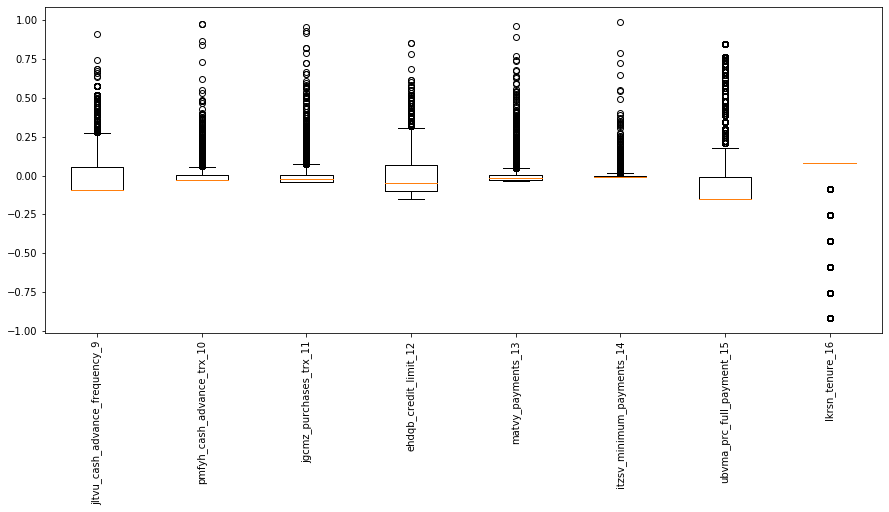

In [9]:
# Visualizing the outliers
fig, ax2 = plt.subplots(figsize=(15, 6))

ax2.boxplot([data.jltvu_cash_advance_frequency_9, data.pmfyh_cash_advance_trx_10, data.jgcmz_purchases_trx_11, 
             data.ehdqb_credit_limit_12, data.matvy_payments_13, data.itzsv_minimum_payments_14, 
             data.ubvma_prc_full_payment_15, data.lkrsn_tenure_16])

boxplot2_labels = ['jltvu_cash_advance_frequency_9', 'pmfyh_cash_advance_trx_10', 'jgcmz_purchases_trx_11', 
             'ehdqb_credit_limit_12', 'matvy_payments_13', 'itzsv_minimum_payments_14', 'ubvma_prc_full_payment_15',
             'lkrsn_tenure_16']

ax2.set_xticklabels(np.repeat(boxplot2_labels, 1), rotation=90, fontsize=10)

plt.show()

The following HeatMap shows correlation between each variable; it can be seen that some variables are highly correlated with other variables. 

In [10]:
# Checking for correlation
print(data.corr())

                                          xslth_balance_0  \
xslth_balance_0                                  1.000000   
fmeyv_balance_frequency_1                        0.322412   
pwnjx_purchases_2                                0.181261   
dxuli_oneoff_purchases_3                         0.164350   
ojukq_installments_purchases_4                   0.126469   
bvnag_cash_advance_5                             0.496692   
gdoka_purchases_frequency_6                     -0.077944   
vozgu_oneoff_purchases_frequency_7               0.073166   
byefw_purchases_installments_frequency_8        -0.063186   
jltvu_cash_advance_frequency_9                   0.449218   
pmfyh_cash_advance_trx_10                        0.385152   
jgcmz_purchases_trx_11                           0.154338   
ehdqb_credit_limit_12                            0.531267   
matvy_payments_13                                0.322802   
itzsv_minimum_payments_14                        0.394282   
ubvma_prc_full_payment_1

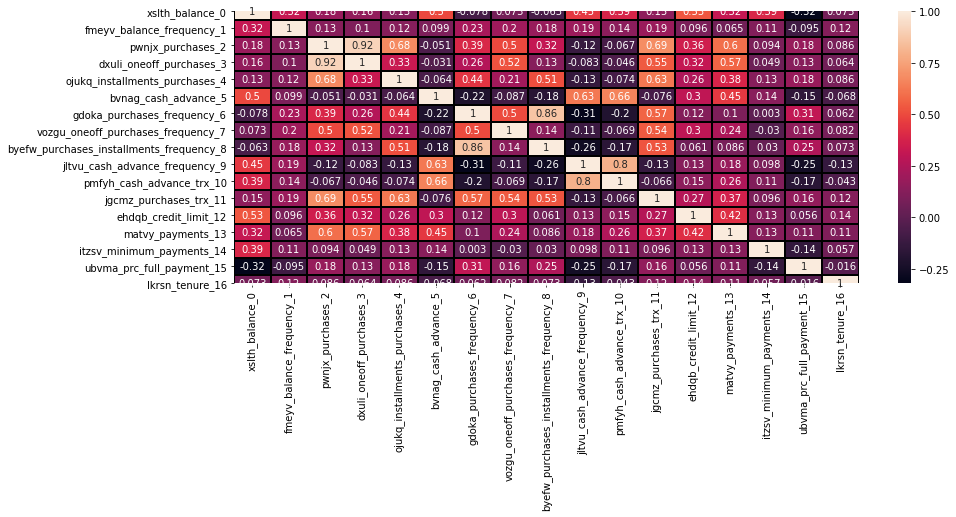

In [11]:
# Plotting the correlation
plt.figure(figsize = (14, 5))
sns.heatmap(data.corr(), linecolor = 'black', linewidth = 1, annot = True)
plt.show()

In [12]:
# Checking the shape if the data after preprocessing
print(data.head())
print('--------------------------------------------------------------------------------------------------------')
print(data.describe())
print('--------------------------------------------------------------------------------------------------------')
print(data.shape)

   xslth_balance_0  fmeyv_balance_frequency_1  pwnjx_purchases_2  \
0        -0.080006                  -0.059089          -0.018512   
1         0.086015                   0.031820          -0.020457   
2         0.048872                   0.122729          -0.004691   
3         0.005367                  -0.240907           0.010110   
4        -0.039214                   0.122729          -0.020131   

   dxuli_oneoff_purchases_3  ojukq_installments_purchases_4  \
0                 -0.014534                        -0.01403   
1                 -0.014534                        -0.01827   
2                  0.004434                        -0.01827   
3                  0.022241                        -0.01827   
4                 -0.014142                        -0.01827   

   bvnag_cash_advance_5  gdoka_purchases_frequency_6  \
0             -0.020766                    -0.323684   
1              0.115918                    -0.490351   
2             -0.020766                     

### Methodology

1. Data Mining process / methodology:

We performed clustering in our dataset. Clustering is an important task of data mining. It is the task of assigning set of similar objects close to each other. By using various clustering models, it can allow us to learn patterns in credit card transactions. We can determine where customers made larger payments and that can serve as the target market for companies. This analysis has a huge impact on economic and business standpoint; grouping customers into various clusters can provide a lot of insights in their behavior and companies can make better recommendations and provide various strategies to their clients.

2. Introduce the data mining model you used in your project
 * Model 1: K-Means
    * K-means is a partitioning-based unsupervised algorithm in which the number of K must be specific, and each cluster is associated with a centroid. 
 
 * Model 2: DBSCAN
    * It locates regions of high density that are separated from one another by regions of low density. DBSCAN is a density-based algorithm, which discovers clusters of arbitrary shape.

 * Model 3: Gaussian Mixture Model
    * It is a distribution mention of listing of outcomes of an experiment and the probability associated with each outcome. 
 
 * Model 4: Agglomerative Clustering
    * It is represented by a set of nested clusters organized as a hierarchical tree and can be visualized as a dendrogram. Agglomerative Clustering starts with the points as individual clusters and at each step, it merges the closest pair of clusters until only one cluster remains.
 
3. Add keywords  
**Keywords:** K-means, DBSCAN, PCA, Gaussian Mixture Model, Agglomerative Clustering
	___


#### Model 1: K-Means

In [13]:
# K-Means Clustering
# Using 5 number of clusters
model1 = KMeans(5)
model1.fit(data)
print('Following are the cluster centers:')
print(model1.cluster_centers_)
lbl = model1.labels_
#print(lbl)
model1_clusters = pd.concat([data, pd.DataFrame({'Cluster_Number':lbl})], axis=1)
model1_clusters.head(10)

Following are the cluster centers:
[[ 3.24647928e-02  9.13843468e-02 -1.48835488e-02 -9.03286808e-03
  -1.60811220e-02  1.30974653e-02 -3.59110664e-01 -1.21351751e-01
  -3.14201850e-01  6.13433912e-02  1.75601266e-02 -3.39943982e-02
  -9.84283723e-03 -5.01342689e-03  2.14089016e-03 -1.29982479e-01
  -3.37564275e-03]
 [ 1.20326262e-03  5.20991566e-02  3.86768750e-03 -5.32143520e-03
   1.80788597e-02 -5.96247529e-03  3.90454725e-01 -7.24477307e-02
   4.65872906e-01 -2.58088760e-02 -6.50880344e-03  2.41856621e-02
  -1.22627038e-02 -2.99454617e-03  4.53913744e-03 -9.67543685e-02
   1.55208645e-02]
 [-7.23887905e-02  3.38435012e-02  1.69857615e-02  5.33346395e-03
   2.73831317e-02 -1.96160803e-02  3.82663855e-01  1.51930039e-02
   4.29702291e-01 -8.32243592e-02 -2.42827818e-02  3.20061598e-02
   5.50301834e-04  3.39124985e-03 -8.74065673e-03  6.66035744e-01
  -3.07947491e-02]
 [ 2.36459655e-02  9.75267127e-02  3.88491654e-02  4.13084362e-02
   9.82500850e-03 -5.59790438e-03  3.92657007e-01 

,xslth_balance_0,fmeyv_balance_frequency_1,pwnjx_purchases_2,dxuli_oneoff_purchases_3,ojukq_installments_purchases_4,bvnag_cash_advance_5,gdoka_purchases_frequency_6,vozgu_oneoff_purchases_frequency_7,byefw_purchases_installments_frequency_8,jltvu_cash_advance_frequency_9,pmfyh_cash_advance_trx_10,jgcmz_purchases_trx_11,ehdqb_credit_limit_12,matvy_payments_13,itzsv_minimum_payments_14,ubvma_prc_full_payment_15,lkrsn_tenure_16,Cluster_Number
0,-0.080006,-0.059089,-0.018512,-0.014534,-0.014030,-0.020766,-0.323684,-0.202458,-0.281104,-0.090096,-0.026413,-0.035502,-0.116676,-0.030191,-9.484791e-03,-0.153715,0.080447,0
1,0.086015,0.031820,-0.020457,-0.014534,-0.018270,0.115918,-0.490351,-0.202458,-0.364437,0.076571,0.006107,-0.041089,0.083658,0.046724,2.724042e-03,0.068507,0.080447,0
2,0.048872,0.122729,-0.004691,0.004434,-0.018270,-0.020766,0.509649,0.797542,-0.364437,-0.090096,-0.026413,-0.007569,0.100352,-0.021905,-3.100819e-03,-0.153715,0.080447,3
3,0.005367,-0.240907,0.010110,0.022241,-0.018270,-0.016401,-0.407018,-0.119125,-0.364437,-0.034541,-0.018283,-0.038296,0.100352,-0.034170,1.722733e-17,-0.153715,0.080447,0
4,-0.039214,0.122729,-0.020131,-0.014142,-0.018270,-0.020766,-0.407018,-0.119125,-0.364437,-0.090096,-0.026413,-0.038296,-0.109998,-0.020796,-8.106874e-03,-0.153715,0.080447,0
5,0.012884,0.122729,0.006731,-0.014534,0.040987,-0.020766,0.176316,-0.202458,0.218896,-0.090096,-0.026413,-0.018743,-0.089965,-0.006567,2.019522e-02,-0.153715,0.080447,1
6,-0.049215,0.122729,0.124141,0.142542,0.012325,-0.020766,0.509649,0.797542,0.635563,-0.090096,-0.026413,0.137682,0.300686,0.091109,-8.718412e-03,0.846285,0.080447,2
7,0.013610,0.122729,-0.011562,-0.014534,0.001117,-0.020766,0.509649,-0.202458,0.635563,-0.090096,-0.026413,-0.007569,-0.073270,-0.020782,-4.347456e-03,-0.153715,0.080447,1
8,-0.028858,0.122729,-0.002890,0.001694,-0.009381,-0.020766,-0.157018,-0.119125,-0.114437,-0.090096,-0.026413,-0.027122,0.083658,-0.020600,-7.227728e-03,-0.153715,0.080447,0
9,-0.074161,-0.331816,0.005677,0.016907,-0.018270,-0.020766,-0.323684,-0.035791,-0.364437,-0.090096,-0.026413,-0.032709,0.217214,-0.011206,-9.997937e-03,-0.153715,0.080447,4


Saving figure kmeans_cluster_histogram_plot


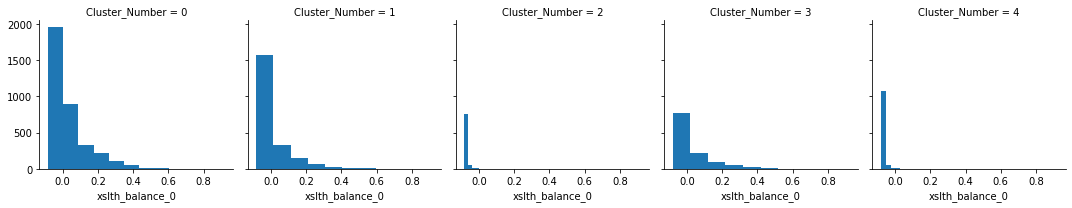

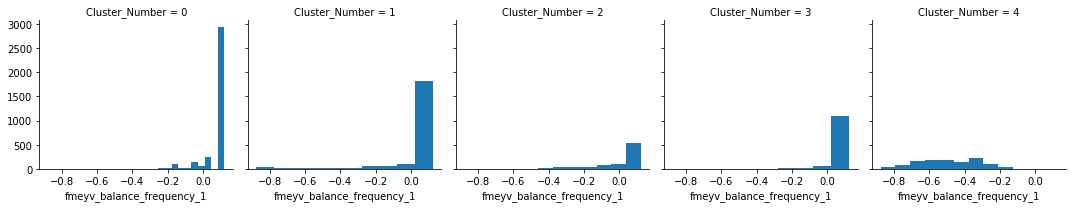

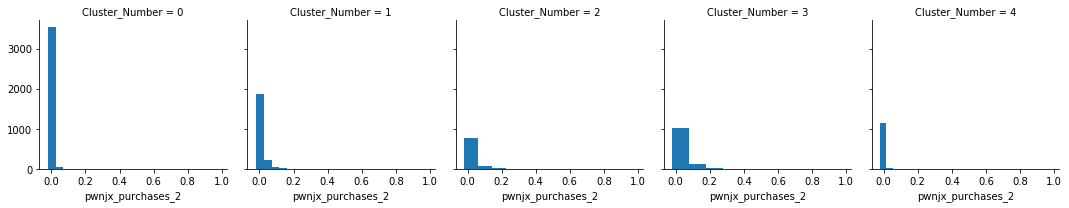

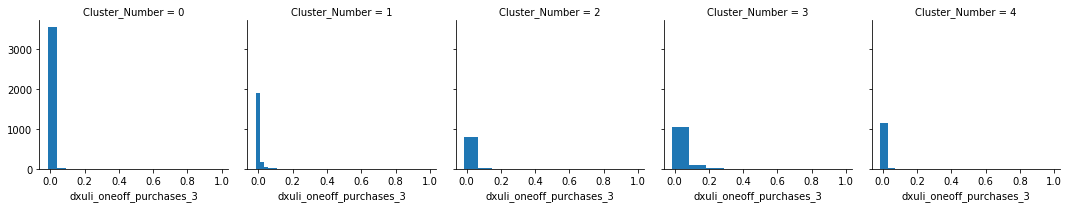

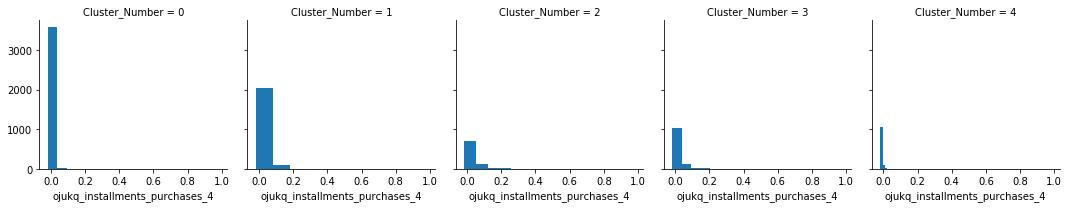

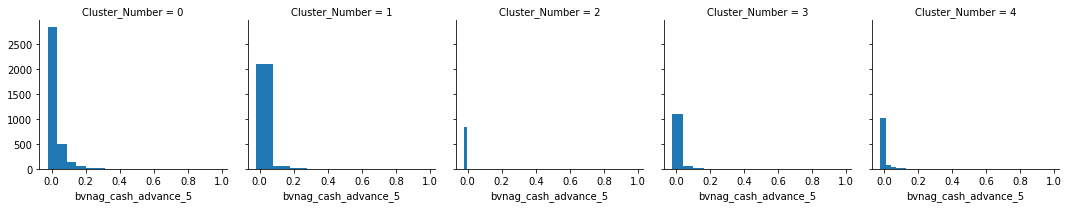

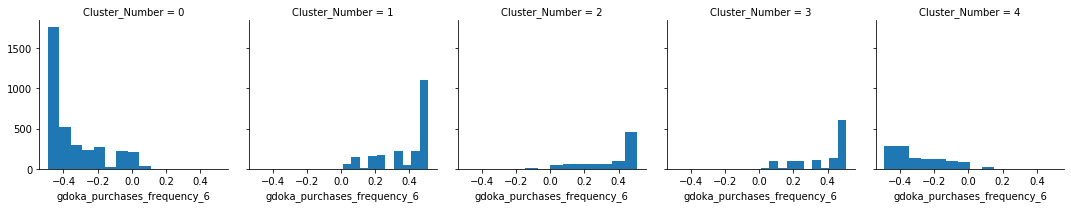

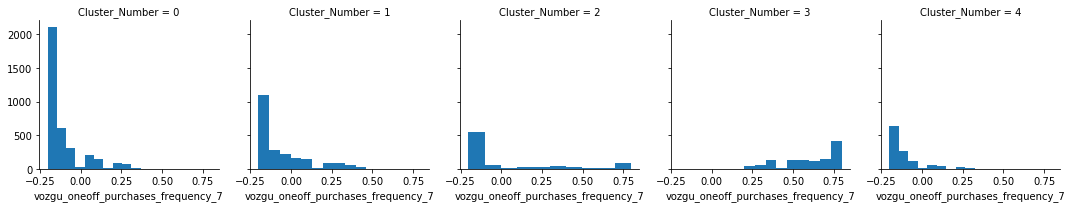

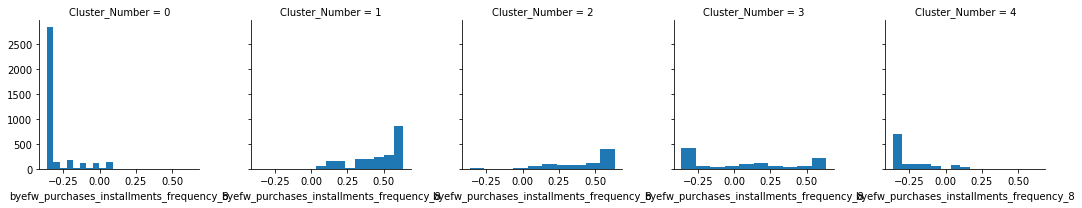

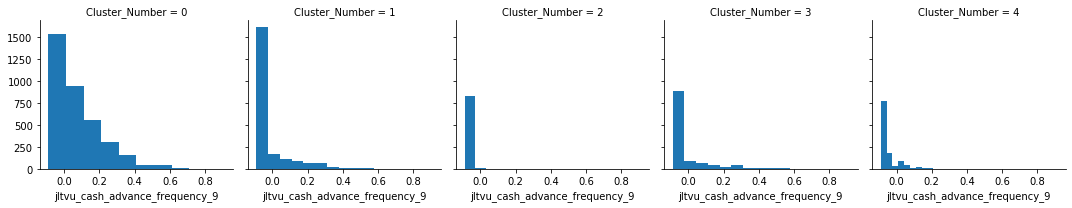

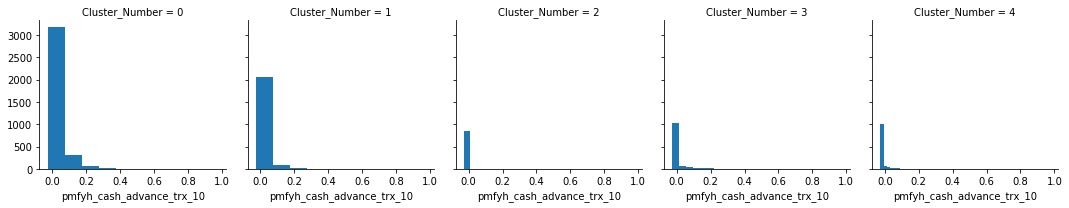

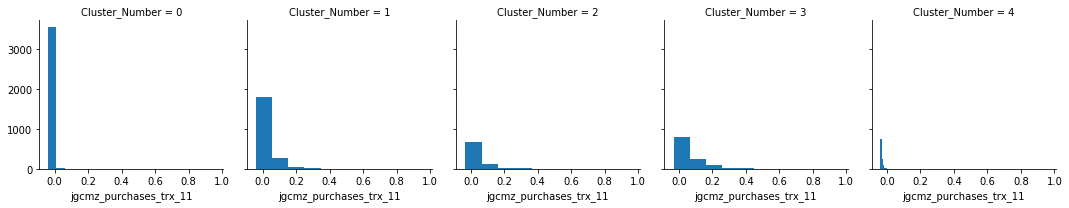

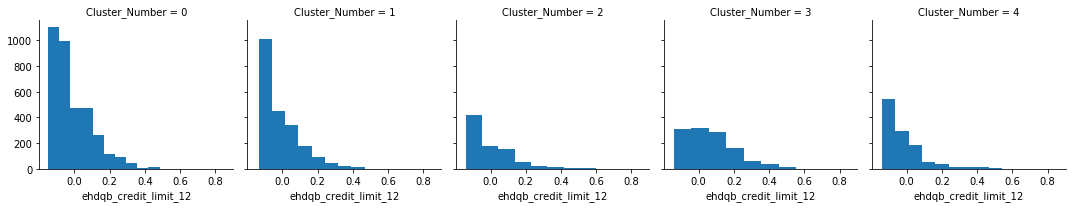

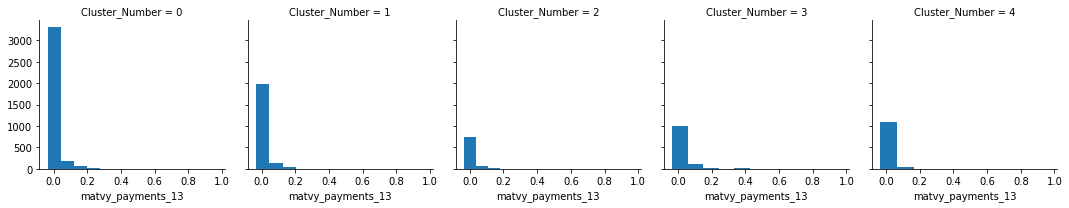

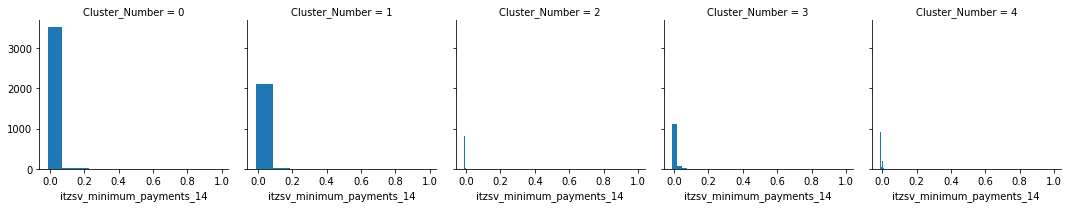

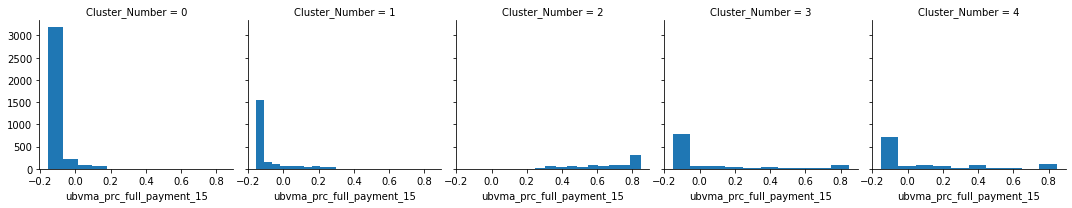

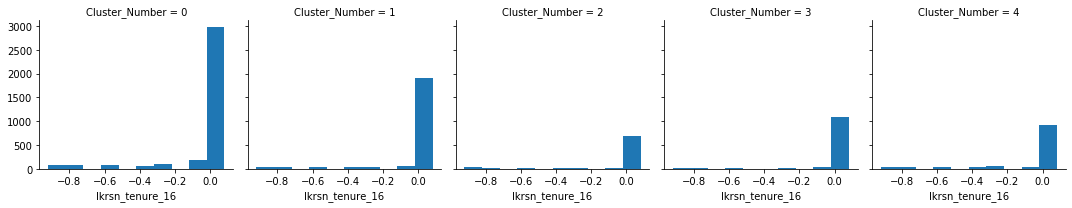

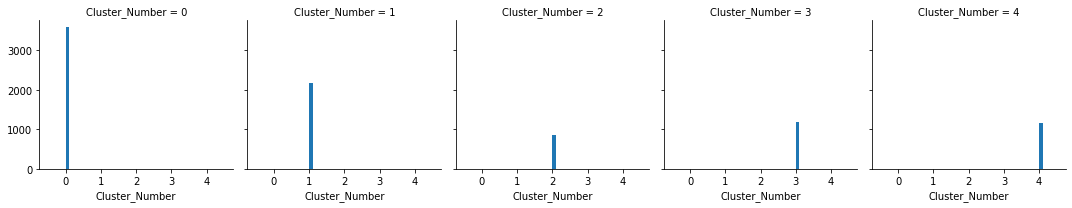

In [14]:
for c in model1_clusters:
    grid= sns.FacetGrid(model1_clusters, col='Cluster_Number')
    grid.map(plt.hist, c)
save_fig("kmeans_cluster_histogram_plot")

(8950, 2)


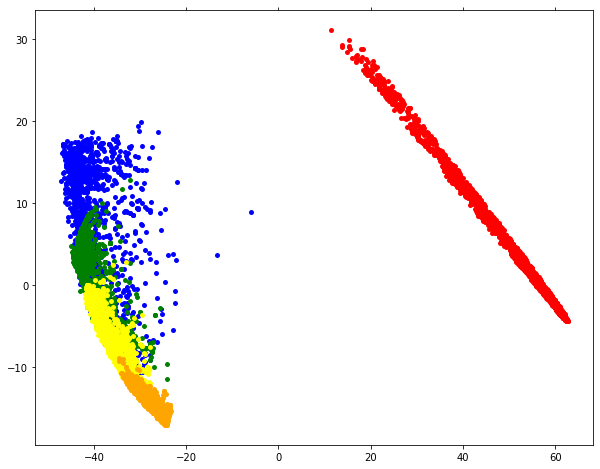

In [15]:
# Visualizing the kmeans clusters by reducing the data to two dimensions
distance = 1 - cosine_similarity(model1_clusters)

model1_PCA = PCA(2) # Selecting 2 components for two dimension representation
model1_PCA.fit(distance)
model1_PCA = model1_PCA.transform(distance)
print(model1_PCA.shape)
x, y = model1_PCA[:, 0], model1_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

df = pd.DataFrame({'x': x, 'y':y, 'label':lbl}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(10, 8)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
plt.show()

#### Model 2: DBSCAN

In [16]:
#DBSCAN Clustering
# Reducing dimensionality of the data

model2_PCA = PCA(n_components = 2)
PCA_data2 = model2_PCA.fit_transform(data)
PCA_data2 = pd.DataFrame(PCA_data2)
PCA_data2.columns = ['P1', 'P2']
print(PCA_data2.head())

         P1        P2
0 -0.482164 -0.097656
1 -0.608577 -0.019379
2  0.304507  0.920946
3 -0.588622 -0.005605
4 -0.554354  0.052965


In [17]:
# Numpy array of all the cluster labels assigned to each data point 
dbscan1 = DBSCAN(eps = 0.03, min_samples = 10).fit(PCA_data2) 
labels = dbscan1.labels_ 
#print(np.unique(labels))

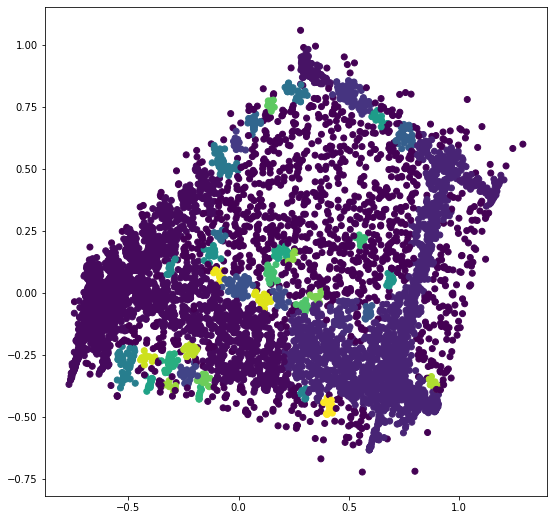

In [18]:
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
plt.figure(figsize =(9, 9)) 
plt.scatter(PCA_data2['P1'], PCA_data2['P2'], c = dbscan1.labels_) 

plt.show() 

In [19]:
dbscan2 = DBSCAN(eps = 0.03, min_samples = 50).fit(PCA_data2) 
labels1 = dbscan2.labels_ 
#print(labels1)

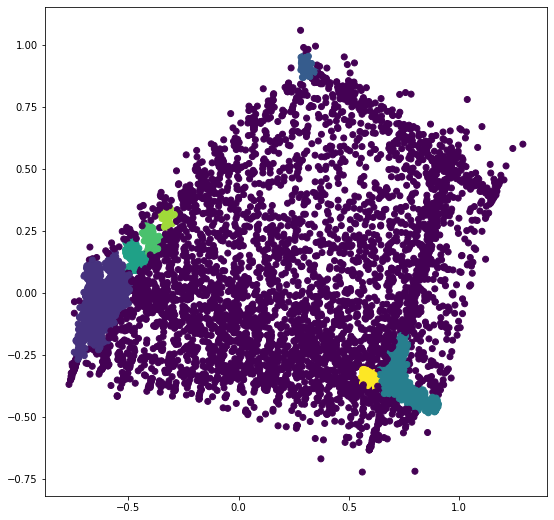

In [20]:
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
plt.figure(figsize =(9, 9)) 
plt.scatter(PCA_data2['P1'], PCA_data2['P2'], c = dbscan2.labels_) 

plt.show() 

#### Model 3: Gaussian Mixture

In [21]:
# Gaussian Mixture Model
gm = GaussianMixture(n_components=5, n_init=10, random_state=42)
gm.fit(PCA_data2)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [22]:
gm.score_samples(PCA_data2)

array([-1.36743874,  1.59197773, -2.5413009 , ..., -1.88721419,
        0.06470775, -2.00963934])

In [23]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

In [24]:
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X.iloc[:, 0], X.iloc[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Log scale: values of z <= 0 have been masked
  from ipykernel import kernelapp as app


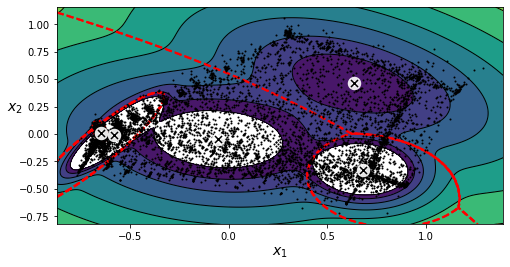

In [25]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, PCA_data2)

plt.show()

In [26]:
# Anomaly Detection using Gaussian Mixtures
densities = gm.score_samples(PCA_data2)
density_threshold = np.percentile(densities, 4)
anomalies = PCA_data2[densities < density_threshold]

C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Log scale: values of z <= 0 have been masked
  from ipykernel import kernelapp as app


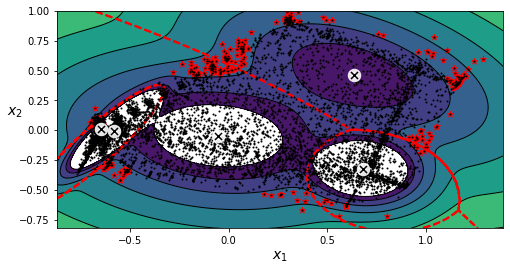

In [27]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, PCA_data2)
plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], color='r', marker='*')
plt.ylim(top=1)

plt.show()

#### Model 4: Agglomerative Clustering

In [28]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(PCA_data2)
agg_labels = agg.labels_

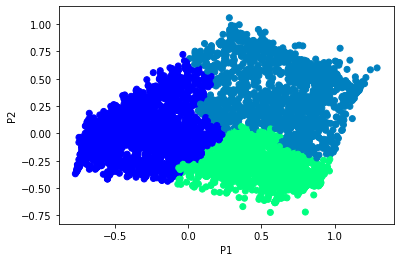

In [29]:
# Visualizing the clustering 
plt.scatter(PCA_data2['P1'], PCA_data2['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(PCA_data2), cmap =plt.cm.winter) 
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()

### Model Selection and Parameters

1. Model 1: K-means
    - We use Elbow Criterion method to determine a good number of clusters: k, based on the sum of squared distance (SSE) between data points and the clusters’ centroids. We build a k-means model using this k, number of clusters.
2. Model 2: DBSCAN
    - We plotted the two dbscan models sidewise in order to compare the models.
3. Model 3: Gaussian Mixture
    - We built and comapred four gaussian mixture models using different covariance types: full, tied, spherical diag.
4. Model 4: Aggmolerative Clustering
    - We implemented a function to return the learned parameters and the child nodes of the model built using the agglomerative clustering.

#### Model 1: K-means 

1: 5935.39676100804
2: 3508.1469522762736
3: 2927.5860940461016
4: 2551.6333303805122
5: 2262.7319488071353
6: 2052.6018078575767
7: 1857.9398669074092
8: 1699.9662867431266
9: 1569.2788729136716
10: 1448.7070671155243
11: 1350.0152423244394
12: 1284.1924048208473
13: 1225.7100953881788
14: 1169.146276361715
15: 1120.5881530708882
16: 1112.848623847655
17: 1060.0759960558005


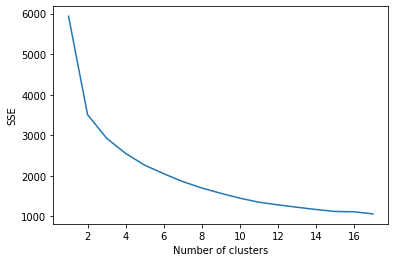

In [30]:
# K-Means Clustering
# Elbow Criterion method
SSE = {}
for k in range(1, 18):
    kmeans = KMeans(n_clusters = k, max_iter = 1000).fit(data)
    # We use inertia which is sum of the distances of data points to the closest cluster centroid
    SSE[k] = kmeans.inertia_ 
    print(str(k) + ': ' + str(SSE[k]))
    
# Plotting the k values against SSE
plt.figure()
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [31]:
# K-Means Clustering
# Using  number of clusters
model2 = KMeans(2)
model2.fit(data)
print('Following are the cluster centers:')
print(model2.cluster_centers_)
lbl1 = model2.labels_
#print(lbl)
model2_clusters = pd.concat([data, pd.DataFrame({'Cluster_Number':lbl1})], axis=1)
model2_clusters.head(10)

Following are the cluster centers:
[[-8.32741114e-03  5.94233262e-02  1.68923964e-02  1.00138550e-02
   1.86798198e-02 -8.73582547e-03  4.02568442e-01  1.33756199e-01
   3.63676932e-01 -3.82829565e-02 -1.05177586e-02  3.94244677e-02
   1.47897609e-02  6.47209297e-03  2.66865049e-04  1.00703525e-01
   1.38215660e-02]
 [ 6.83644028e-03 -4.87839514e-02 -1.38679185e-02 -8.22093689e-03
  -1.53353150e-02  7.17173058e-03 -3.30491081e-01 -1.09807989e-01
  -2.98562853e-01  3.14286327e-02  8.63461976e-03 -3.23657634e-02
  -1.21417467e-02 -5.31330522e-03 -2.19084532e-04 -8.26731887e-02
  -1.13469010e-02]]


,xslth_balance_0,fmeyv_balance_frequency_1,pwnjx_purchases_2,dxuli_oneoff_purchases_3,ojukq_installments_purchases_4,bvnag_cash_advance_5,gdoka_purchases_frequency_6,vozgu_oneoff_purchases_frequency_7,byefw_purchases_installments_frequency_8,jltvu_cash_advance_frequency_9,pmfyh_cash_advance_trx_10,jgcmz_purchases_trx_11,ehdqb_credit_limit_12,matvy_payments_13,itzsv_minimum_payments_14,ubvma_prc_full_payment_15,lkrsn_tenure_16,Cluster_Number
0,-0.080006,-0.059089,-0.018512,-0.014534,-0.014030,-0.020766,-0.323684,-0.202458,-0.281104,-0.090096,-0.026413,-0.035502,-0.116676,-0.030191,-9.484791e-03,-0.153715,0.080447,1
1,0.086015,0.031820,-0.020457,-0.014534,-0.018270,0.115918,-0.490351,-0.202458,-0.364437,0.076571,0.006107,-0.041089,0.083658,0.046724,2.724042e-03,0.068507,0.080447,1
2,0.048872,0.122729,-0.004691,0.004434,-0.018270,-0.020766,0.509649,0.797542,-0.364437,-0.090096,-0.026413,-0.007569,0.100352,-0.021905,-3.100819e-03,-0.153715,0.080447,0
3,0.005367,-0.240907,0.010110,0.022241,-0.018270,-0.016401,-0.407018,-0.119125,-0.364437,-0.034541,-0.018283,-0.038296,0.100352,-0.034170,1.722733e-17,-0.153715,0.080447,1
4,-0.039214,0.122729,-0.020131,-0.014142,-0.018270,-0.020766,-0.407018,-0.119125,-0.364437,-0.090096,-0.026413,-0.038296,-0.109998,-0.020796,-8.106874e-03,-0.153715,0.080447,1
5,0.012884,0.122729,0.006731,-0.014534,0.040987,-0.020766,0.176316,-0.202458,0.218896,-0.090096,-0.026413,-0.018743,-0.089965,-0.006567,2.019522e-02,-0.153715,0.080447,0
6,-0.049215,0.122729,0.124141,0.142542,0.012325,-0.020766,0.509649,0.797542,0.635563,-0.090096,-0.026413,0.137682,0.300686,0.091109,-8.718412e-03,0.846285,0.080447,0
7,0.013610,0.122729,-0.011562,-0.014534,0.001117,-0.020766,0.509649,-0.202458,0.635563,-0.090096,-0.026413,-0.007569,-0.073270,-0.020782,-4.347456e-03,-0.153715,0.080447,0
8,-0.028858,0.122729,-0.002890,0.001694,-0.009381,-0.020766,-0.157018,-0.119125,-0.114437,-0.090096,-0.026413,-0.027122,0.083658,-0.020600,-7.227728e-03,-0.153715,0.080447,1
9,-0.074161,-0.331816,0.005677,0.016907,-0.018270,-0.020766,-0.323684,-0.035791,-0.364437,-0.090096,-0.026413,-0.032709,0.217214,-0.011206,-9.997937e-03,-0.153715,0.080447,1


(8950, 2)


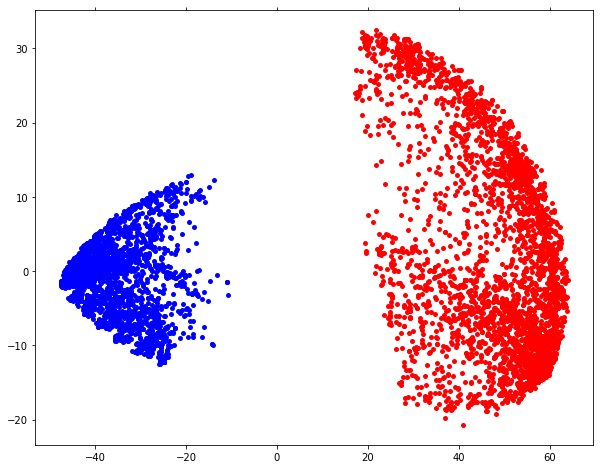

In [32]:
# Visualizing the kmeans clusters by reducing the data to two dimensions
distance = 1 - cosine_similarity(model2_clusters)

model2_PCA = PCA(2) # Selecting 2 components for two dimension representation
model2_PCA.fit(distance)
model2_PCA = model2_PCA.transform(distance)
print(model2_PCA.shape)
x, y = model2_PCA[:, 0], model2_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

df = pd.DataFrame({'x': x, 'y':y, 'label':lbl1}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(10, 8)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
plt.show()

#### Model 2: DBSCAN

In [33]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c="r", marker="x", s=100)
    plt.scatter(non_cores.iloc[:, 0], non_cores.iloc[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

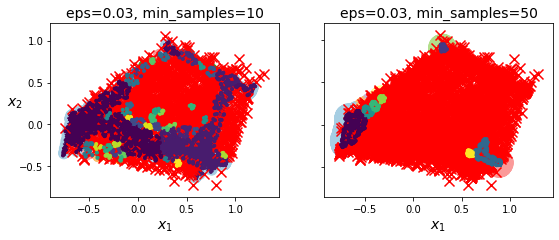

In [34]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan1, PCA_data2, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, PCA_data2, size=600, show_ylabels=False)

plt.show()

#### Model 3: Gaussian Mixture

In [35]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(PCA_data2)
gm_tied.fit(PCA_data2)
gm_spherical.fit(PCA_data2)
gm_diag.fit(PCA_data2)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=10,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [36]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Log scale: values of z <= 0 have been masked
  from ipykernel import kernelapp as app
C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Log scale: values of z <= 0 have been masked
  from ipykernel import kernelapp as app


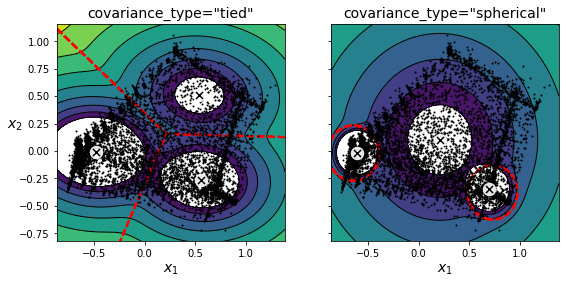

In [37]:
compare_gaussian_mixtures(gm_tied, gm_spherical, PCA_data2)
plt.show()

C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Log scale: values of z <= 0 have been masked
  from ipykernel import kernelapp as app
C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Log scale: values of z <= 0 have been masked
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ShraddhaM\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Log scale: values of z <= 0 have been masked
  from ipykernel import kernelapp as app


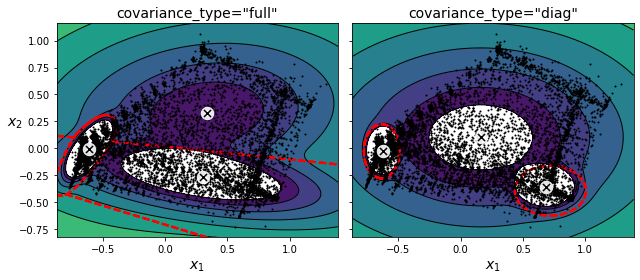

In [38]:
compare_gaussian_mixtures(gm_full, gm_diag, PCA_data2)
plt.tight_layout()
plt.show()

#### Model 4: Agglomerative Clustering

In [39]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [40]:
print(learned_parameters(agg))
print('--------------------------------------------------------------------------------------------------------')
print(agg.children_)

['children_', 'labels_', 'n_clusters_', 'n_components_', 'n_connected_components_', 'n_leaves_']
--------------------------------------------------------------------------------------------------------
[[  275  4405]
 [ 4549  5145]
 [ 1004  1965]
 ...
 [17887 17893]
 [17894 17895]
 [17896 17897]]


###  Evaluation of Results


•	Interpret and explain the outcome of your models (coefficients, parameters, errors, etc...)
•	Have you used ensemble methods?
•	Mention your results in terms of accuracy, precision, recall, ROC etc. as per your need. 
•	You should provide the necessary tables that summarize your results and add charts.

1. Model 1: K-means
    - We evaluated the k-means models using the silhouette score method. Silhouette analysis is used to determine the degree of separation between clusters. Models with silhouette score of 0.5 and above are good.
2. Model 2: DBSCAN
    - We evaluated the dbscan models using the silhouette score method.
3. Model 3: Gaussian Mixture
    - We calculated the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) by varying the number of clusters and dimensions. We also, found the best number for k and the best covariance type.
4. Model 4: Aggmolerative Clustering
    - We evaluated the aggmoleravtive clustering model using the silhouette score method.

#### Model 1: K-means

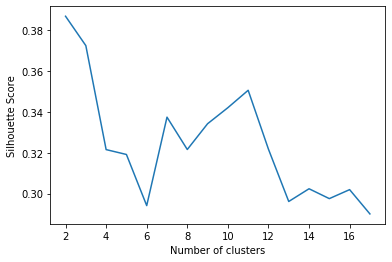

In [41]:
# K-Means Clustering
# Silhouette Score method
scores = [] 

for k in range(2, 18):
    scores.append(silhouette_score(data, KMeans(n_clusters = k).fit_predict(data))) 
    
# Plotting k values against silhouette score
plt.plot(range(2, 18) ,scores)
#plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

In [42]:
print("Silhouette Coefficient for k-means model1: %0.3f"
      % metrics.silhouette_score(data, lbl))
print("Silhouette Coefficient for k-means model2: %0.3f"
      % metrics.silhouette_score(data, lbl1))

Silhouette Coefficient for k-means model1: 0.319
Silhouette Coefficient for k-means model2: 0.387


#### Model 2: DBSCAN

In [43]:
print("Silhouette Coefficient for dbscan1 model: %0.3f"
      % metrics.silhouette_score(PCA_data2, labels))
print("Silhouette Coefficient for dbscan2 model: %0.3f"
      % metrics.silhouette_score(PCA_data2, labels1))

Silhouette Coefficient for dbscan1 model: -0.263
Silhouette Coefficient for dbscan2 model: -0.041


#### Model 3: Gaussian Mixture

In [44]:
print('BIC:')
print(gm.bic(PCA_data2))
print('AIC:')
print(gm.aic(PCA_data2))

BIC:
935.167982646562
AIC:
729.2851271197638


In [45]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(PCA_data2) * len(PCA_data2) # log(L^)
bic = np.log(len(PCA_data2)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [46]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(PCA_data2)
             for k in range(1, 15)]

In [47]:
bics = [model.bic(PCA_data2) for model in gms_per_k]
aics = [model.aic(PCA_data2) for model in gms_per_k]

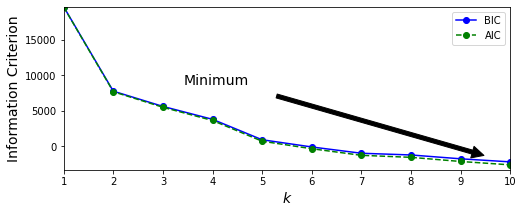

In [48]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 15), bics, "bo-", label="BIC")
plt.plot(range(1, 15), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 10, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(10, bics[10]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [49]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(PCA_data2).bic(PCA_data2)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [50]:
print('Best_k: ')
print(best_k)
print('Best Covariance Type: ')
print(best_covariance_type)

Best_k: 
10
Best Covariance Type: 
full


#### Model 4: Agglomerative Clustering

In [51]:
print("Silhouette Coefficient for agglomerative model: %0.3f"
      % metrics.silhouette_score(PCA_data2, agg_labels))

Silhouette Coefficient for agglomerative model: 0.550


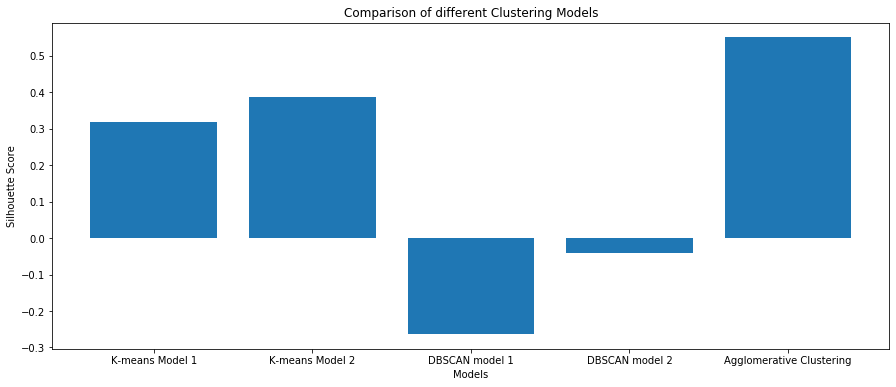

In [52]:
# List of different models 
models = ['K-means Model 1', 'K-means Model 2', 'DBSCAN model 1', 'DBSCAN model 2', 'Agglomerative Clustering'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(data, lbl)) 
s_scores.append(silhouette_score(data, lbl1)) 
s_scores.append(silhouette_score(PCA_data2, labels)) 
s_scores.append(silhouette_score(PCA_data2, labels1)) 
s_scores.append(silhouette_score(PCA_data2, agg_labels)) 
  
# Plotting a Bar Graph to compare the models 
fig, ax3 = plt.subplots(figsize=(15, 6))
ax3.bar(models, s_scores) 
plt.xlabel('Models') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

### Issues / Improvements

identitify issues and propose potential solutions to improve your results
1. Dataset is small.
2. We faced issue while trying to build dendrogram. It took a lot of time to run, without giving any output. 
3. As future scope we would like to explore more about how we can compare all the clustering models.

###  References
   - Academic (if any)
       Material and code on Canvas
   - Online (if any)
        [1] Peng, Y., Kou, G., Shi, Y., & Chen, Z. (2005, May 22). Improving Clustering Analysis for Credit Card Accounts Classification. Retrieved April 29, 2020, from https://link.springer.com/chapter/10.1007/11428862_75. 
        
        [2] Platypus, G. (2019, December 2). Credit Card Dataset. Retrieved April 12, 2020, from https://www.kaggle.com/arjunbhasin/credit-card-dataset#credit_data_norm.csv
        
        [3] Class Lecture notes- Basic_cluster_analysis (STD).pdf
        
        [4] https://www.kaggle.com/arjunbhasin/credit-card-dataset
        
        [5] https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/
        
        [6] https://www.geeksforgeeks.org/gaussian-mixture-model/
        
        [7] https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
        
        [8] https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec
        
        [9] https://towardsdatascience.com/how-dbscan-works-and-why-should-i-use-it-443b4a191c80
        
        [10] https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95

### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. Keep in mind that all documents in your projects and code will be check against the official plagiarism detection tool used by Penn State ([Turnitin](https://turnitin.psu.edu))

[1] https://www.kaggle.com/sabanasimbutt/clustering-visualization-of-clusters-using-pca

[2] https://www.kaggle.com/vipulgandhi/kmeans-detailed-explanation/comments

In [53]:
# End of Project